# Abschlussprojektsbericht des Machine-Learning-Kurses

## Teilnehmern: 
### ICH
### Ein anderer Teilnehmer
### Ein anderer Teilnehmer

# Diabetes-Vorhersage mit maschinem Lernen

## Inhalt
### 1. Einführung
### 2. Bibliotheken installieren
### 3. Importieren von Daten
### 4. Analyse fehlender Werte
### 5. Explorative Datenanalyse
### 6. Feature-Engineering
### 7. Modellieren
### 8. Vorhersage
### 9. Schlussfolgerung

### 1. Einführung
Diabetes ist ein Gesundheitszustand, der beeinflusst, wie Ihr Körper Nahrung in Energie umwandelt. Der größte Teil der Nahrung, die Sie zu sich nehmen, wird in Zucker (Glukose) zerlegt und in Ihren Blutkreislauf abgegeben. Wenn Ihr Blutzucker steigt, signalisiert dies Ihrer Bauchspeicheldrüse, Insulin freizusetzen.
Ohne kontinuierliche, sorgfältige Behandlung kann Diabetes zu einer Anhäufung von Zucker im Blut führen, was das Risiko gefährlicher Komplikationen, einschließlich Schlaganfall und Herzerkrankungen, erhöhen kann. Also entscheiden wir uns für die Vorhersage mit maschinem Lernen in Python.

### Motivation
Motivation für das Projekt.
wir haben beschlossen, die Lernfähigkeiten der KI zu erweitern, indem wir uns mit der Diabetesvorhersage befassen. in dem datensatz geht es um einen indieanerstamm aus arizona. in dieser studie wurde getestet, warum dieser stamm kein diabetes bekommen hat. es wurde hauptsächlich mit frauen gemacht, die schwanger waren. 

# Ziele
das ziel ist, dass wir voraussagen können, ob der probant diebetes hat oder nicht.
Finden wir die wichtigsten Merkmale von Diabetes Probieren wir verschiedene Klassifizierungsmethoden aus, um die höchste Genauigkeit zu finden womit wir die KI zum lernen bringen um etwas vorherzusagen.

0 – Abwesenheit von Diabetes

1 – Vorhandensein von Diabetes

### 2 - Bibliotheken installieren
In diesem ersten Schritt habe ich die gängigsten Bibliotheken importiert, die in Python für maschinelles Lernen verwendet werden, wie Pandas, Seaborn, Matplitlib .......

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,SVR
from collections import Counter
from sklearn import svm, datasets
import numpy as np 
import pandas as pd 
import seaborn as sns 
import os
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 

### 3. Importieren von Daten

In [3]:
gesamt = pd.read_csv('diabetes_neu.csv')
print(gesamt.head())
print(gesamt.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     627.0   50        1  
1                     351.0   31        0  
2                     672.0   32        1  
3                     167.0   21        0  
4                    2288.0   33        1  
(768, 9)


### Datensatz Beschreibung
Mit Ausnahme von BMI und DiabetesPedigreeFunction sind alle Spalten ganzzahlig. Ergebnis ist das Etikett mit den Werten 1 und 0. 1 bedeutet, dass die Person Diabetes hat, und 0 bedeutet, dass die Person kein Diabetiker ist.

In [4]:
gesamt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
gesamt.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### Statistik beschreiung

In [6]:
gesamt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,428.235091,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,340.485655,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,205.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,337.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,591.500000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2329.000000,81.000000,1.000000


Es gibt 768 Datensätze im Datensatz, in denen das Durchschnittsalter der Personen 33 Jahre beträgt

### 4. Analyse fehlender Werte

Als nächstes werden die Daten im Datensatz bereinigt. Fehlende Daten können bei der Modellierung und Vorhersage zu falschen ergebnissen in der Statistiken führen. möglichs vermeinden!

In [7]:
gesamt.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Es wurde festgestellt, dass es im Datensatz keine fehlenden Werte gibt, aber die Funktionen wie Glucose, BloodPressure, Insulin, SkinThickness haben 0-Werte, was nicht möglich ist. Wir müssen 0-Werte entweder durch Mittel- oder Medianwerte einer bestimmten Spalte ersetzen.

#### Korrigieren fehlender Werte an Glucose

In [8]:
gesamt['Glucose'] = gesamt['Glucose'].replace(0,gesamt['Glucose'].mean())
gesamt.Glucose.value_counts()

99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: Glucose, Length: 136, dtype: int64

#### Korrigieren fehlender Werte an BloodPressure

In [9]:
gesamt [gesamt ['BloodPressure'] == 0]['BloodPressure'].value_counts()
gesamt ['BloodPressure'] = gesamt ['BloodPressure'].replace(0, gesamt ['BloodPressure'].mean())
gesamt.BloodPressure.value_counts()

70.000000     57
74.000000     52
78.000000     45
68.000000     45
72.000000     44
64.000000     43
80.000000     40
76.000000     39
60.000000     37
69.105469     35
62.000000     34
66.000000     30
82.000000     30
88.000000     25
84.000000     23
90.000000     22
86.000000     21
58.000000     21
50.000000     13
56.000000     12
52.000000     11
54.000000     11
75.000000      8
92.000000      8
65.000000      7
85.000000      6
94.000000      6
48.000000      5
96.000000      4
44.000000      4
100.000000     3
106.000000     3
98.000000      3
110.000000     3
55.000000      2
108.000000     2
104.000000     2
46.000000      2
30.000000      2
122.000000     1
95.000000      1
102.000000     1
61.000000      1
24.000000      1
38.000000      1
40.000000      1
114.000000     1
Name: BloodPressure, dtype: int64

#### Korrigieren fehlender Werte an BMI

In [10]:
gesamt [gesamt ['BMI'] == 0]['BMI'].value_counts()
gesamt ['BMI'] = gesamt ['BMI'].replace(0, gesamt ['BMI'].median())
gesamt.BMI.value_counts()

32.0    24
31.2    12
31.6    12
32.4    10
33.3    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 247, dtype: int64

#### Korrigieren fehlender Werte an Hautdicke

In [11]:
gesamt ['SkinThickness'] = gesamt ['SkinThickness'].replace(0, gesamt ['SkinThickness'].median())
gesamt.SkinThickness.value_counts()

23    249
32     31
30     27
27     23
28     20
33     20
18     20
31     19
19     18
39     18
29     17
25     16
37     16
40     16
22     16
26     16
35     15
41     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
45      6
16      6
43      6
11      6
14      6
44      5
10      5
47      4
48      4
50      3
49      3
54      2
7       2
52      2
8       2
56      1
51      1
60      1
63      1
99      1
Name: SkinThickness, dtype: int64

#### Korrigieren fehlender Werte an Insulin

In [12]:
gesamt ['Insulin'] = gesamt ['Insulin'].replace(0, gesamt ['Insulin'].median())
gesamt.Insulin.value_counts()

30.5     374
105.0     11
130.0      9
140.0      9
120.0      8
        ... 
73.0       1
171.0      1
255.0      1
52.0       1
112.0      1
Name: Insulin, Length: 186, dtype: int64

#### Dataset-Statistiken überprüfen

In [13]:
gesamt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450911,428.235091,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875366,340.485655,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.100000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,205.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,337.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,591.500000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2329.000000,81.000000,1.000000


Es wurde ein datensatz ohne fehlende werte erschaffen.

### 5. Überprüfen Datenanalyse

In [14]:
gesamt.head(13)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35,30.5,33.6,627.0,50,1
1,1,85.0,66.000000,29,30.5,26.6,351.0,31,0
2,8,183.0,64.000000,23,30.5,23.3,672.0,32,1
3,1,89.0,66.000000,23,94.0,28.1,167.0,21,0
4,0,137.0,40.000000,35,168.0,43.1,2288.0,33,1
5,5,116.0,74.000000,23,30.5,25.6,201.0,30,0
6,3,78.0,50.000000,32,88.0,31.0,248.0,26,1
7,10,115.0,69.105469,23,30.5,35.3,134.0,29,0
8,2,197.0,70.000000,45,543.0,30.5,158.0,53,1
9,8,125.0,96.000000,23,30.5,32.0,232.0,54,1


#### Korrelation

Wir können die Korrelationen mithilfe einer Heatmap darstellen, wie unten gezeigt.

In [15]:
matrix = gesamt.corr()

In [16]:
gesamt.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.032568,-0.055697,0.021546,-0.026205,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.172361,0.357081,0.231469,0.134106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.152458,-0.022049,0.281232,0.009414,0.326740,0.162986
SkinThickness,0.032568,0.172361,0.152458,1.000000,0.238188,0.546951,0.092293,0.054514,0.189065
Insulin,-0.055697,0.357081,-0.022049,0.238188,1.000000,0.189022,0.179762,-0.015413,0.148457
BMI,0.021546,0.231469,0.281232,0.546951,0.189022,1.000000,0.108365,0.025744,0.312249
DiabetesPedigreeFunction,-0.026205,0.134106,0.009414,0.092293,0.179762,0.108365,1.000000,0.017970,0.176608
Age,0.544341,0.266600,0.326740,0.054514,-0.015413,0.025744,0.017970,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.189065,0.148457,0.312249,0.176608,0.238356,1.000000


#### Erstellung einer heatmap für Korrelationen Graf

<AxesSubplot:>

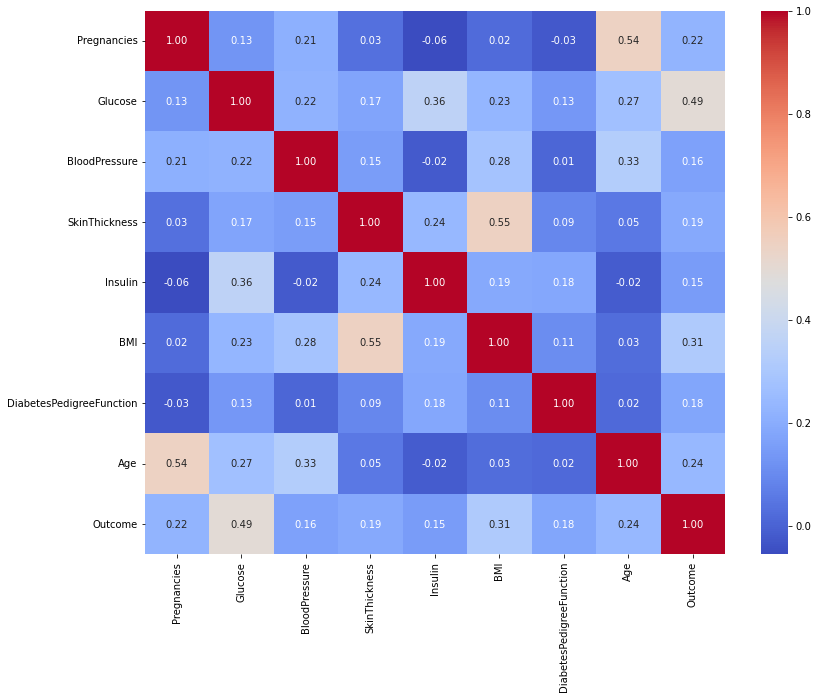

In [17]:
ax = plt.subplots(figsize=(13,10)) 
sns.heatmap(gesamt.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Beobachtungen zufolge korrelieren Merkmale wie Glukose, BMI, Alter und Schwangerschaft stärker mit dem Ergebnis

### Überprüfung der Verteilung der Zielvariablen

<AxesSubplot:xlabel='Outcome', ylabel='count'>

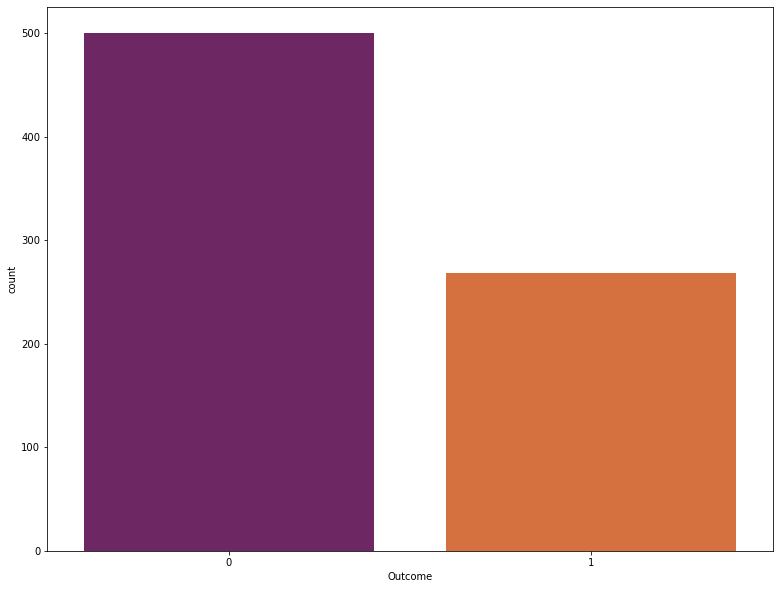

In [18]:
plt.figure(figsize=(13,10))
sns.countplot("Outcome",data=gesamt,palette="inferno")

Es gibt 500(65%) Menschen ohne Diabetes und 269(35%) mit Diabetes

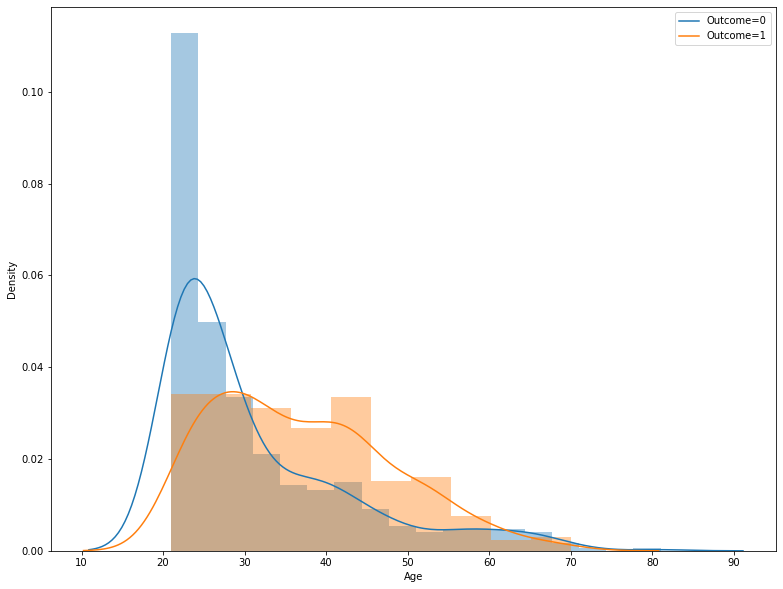

In [19]:
plt.figure(figsize=(13,10))
sns.distplot(gesamt['Age'][gesamt.Outcome==0])
sns.distplot(gesamt['Age'][gesamt.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()

Es gibt mehr Menschen, die kein Insulin brauchen in diesem Datensatz

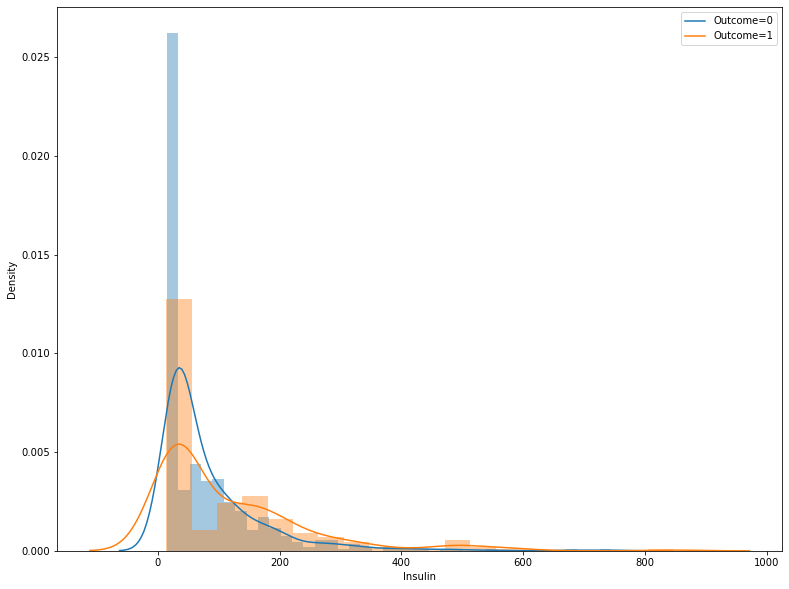

In [20]:
plt.figure(figsize=(13,10))
sns.distplot(gesamt['Insulin'][gesamt.Outcome==0])
sns.distplot(gesamt['Insulin'][gesamt.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()

### Überprüfung der Verteilung der Glukose 

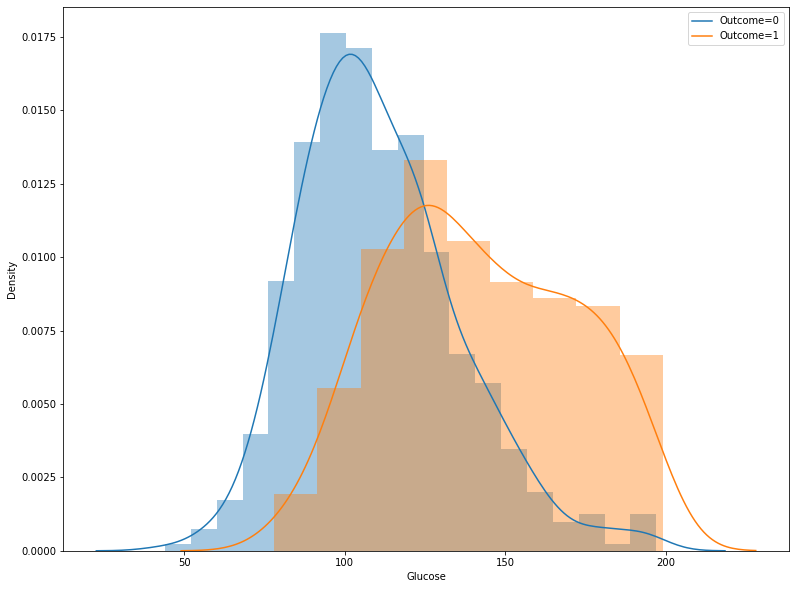

In [21]:
plt.figure(figsize=(13,10))
sns.distplot(gesamt['Glucose'][gesamt.Outcome==0])
sns.distplot(gesamt['Glucose'][gesamt.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()

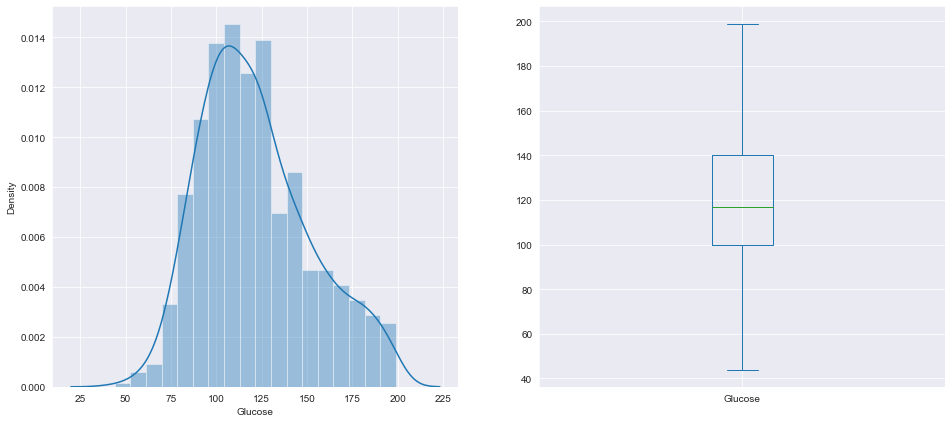

In [22]:
%matplotlib inline
sns.set_style('darkgrid')
plt.figure(1) 
plt.subplot(121), sns.distplot(gesamt['Glucose'])
plt.subplot(122), gesamt['Glucose'].plot.box(figsize=(16,7))
plt.show()

wir überprüfen Glukose vs. Ergebnis

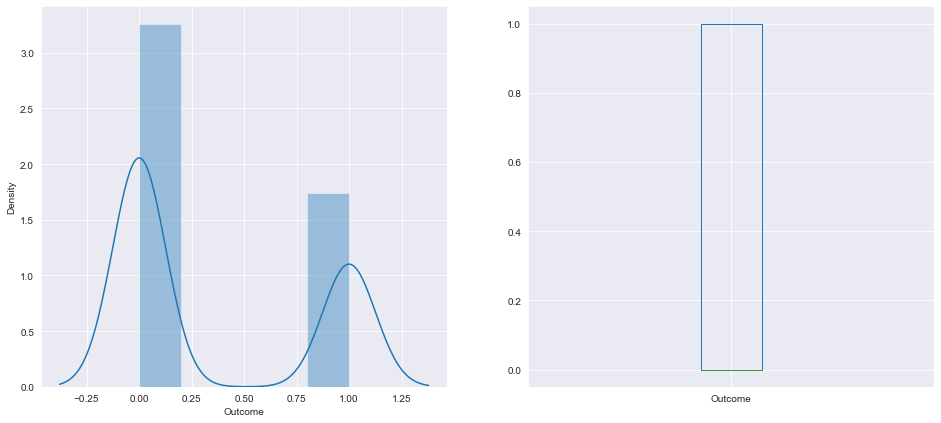

In [23]:
%matplotlib inline
sns.set_style('darkgrid')
plt.figure(1) 
plt.subplot(121), sns.distplot(gesamt['Outcome'])
plt.subplot(122), gesamt['Outcome'].plot.box(figsize=(16,7))
plt.show()

überprüfung der Glukose und mit Outcome

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

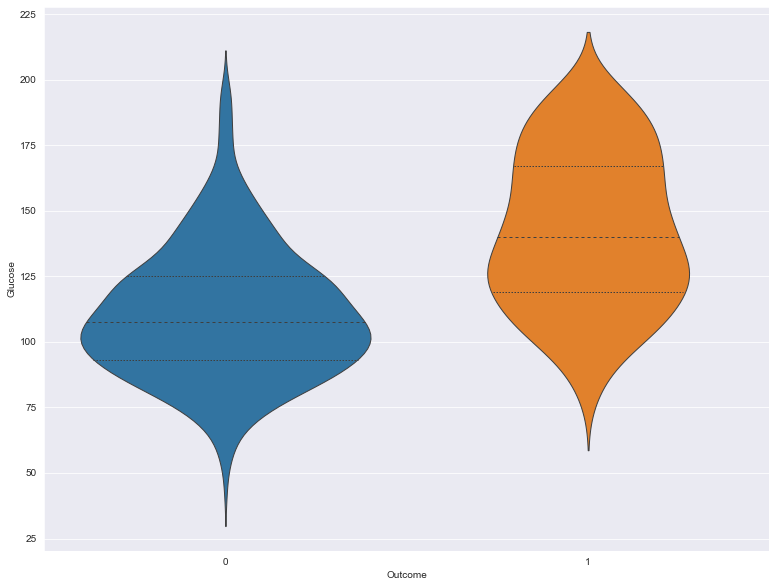

In [24]:
plt.figure(figsize=(13,10))
sns.violinplot(data=gesamt, x="Outcome", y="Glucose",split=True, inner="quart", linewidth=1)

Die Wahrscheinlichkeit von Diabetes steigt allmählich mit dem Glukosespiegel

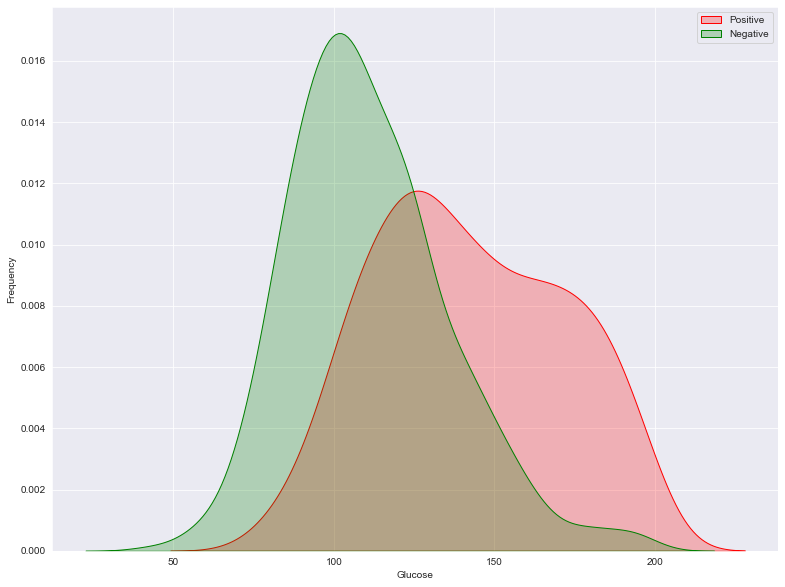

In [25]:
plt.figure(figsize=(13,10))
g = sns.kdeplot(gesamt["Glucose"][ gesamt ["Outcome"] == 1], color="Red", shade = True)
g = sns.kdeplot(gesamt ["Glucose"][ gesamt ["Outcome"] == 0], ax =g, color="Green", shade= True)
g.set_xlabel("Glucose")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

### Überprüfung der Verteilung der Pregnancies 

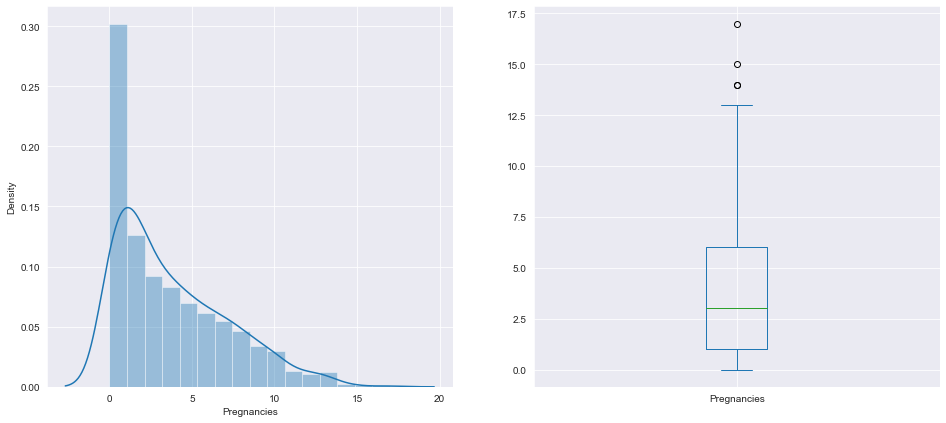

In [26]:
%matplotlib inline
sns.set_style('darkgrid')
plt.figure(1) 
plt.subplot(121), sns.distplot(gesamt['Pregnancies'])
plt.subplot(122), gesamt['Pregnancies'].plot.box(figsize=(16,7))
plt.show()

wir überprüfen Pregnancies vs Outcom

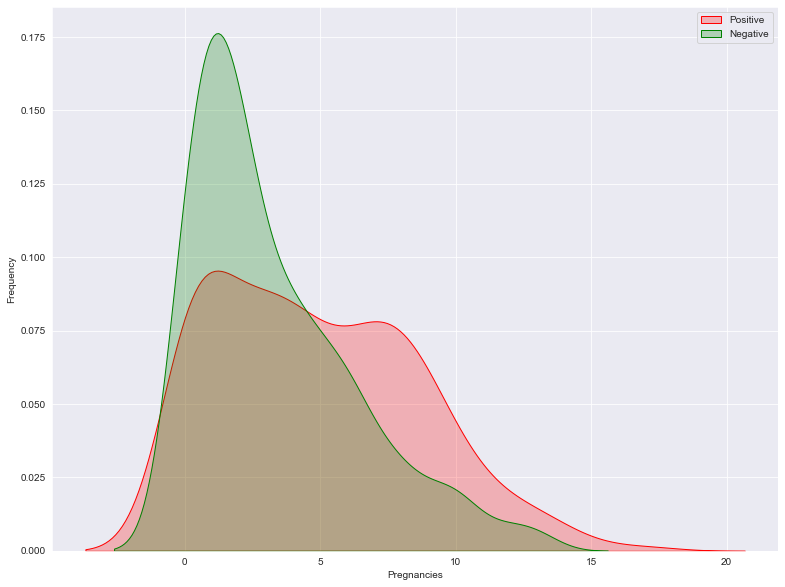

In [27]:
plt.figure(figsize=(13,10))
g = sns.kdeplot(gesamt["Pregnancies"][gesamt["Outcome"] == 1], color="Red", shade = True)
g = sns.kdeplot(gesamt ["Pregnancies"][ gesamt ["Outcome"] == 0], ax =g, color="Green", shade= True)
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

### Überprüfung der Verteilung der Age

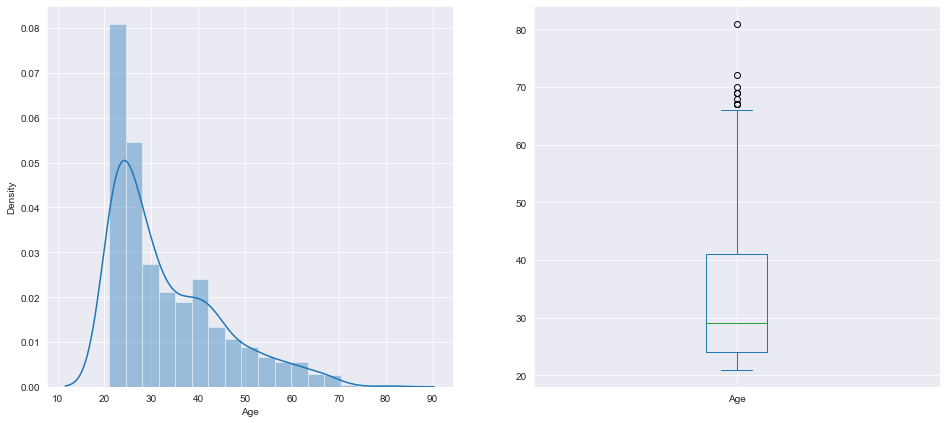

In [28]:
%matplotlib inline
sns.set_style('darkgrid')
plt.figure(1) 
plt.subplot(121), sns.distplot(gesamt['Age'])
plt.subplot(122), gesamt['Age'].plot.box(figsize=(16,7))
plt.show()

wir überprüfen Age vs Outcome

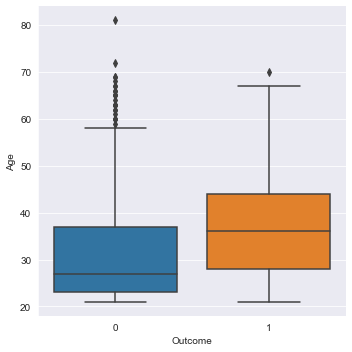

In [29]:
g = sns.catplot(y="Age",x="Outcome",data=gesamt,kind="box")
g.set_ylabels("Age")
g.set_xlabels("Outcome")

### Überprüfung der Verteilung den BMI

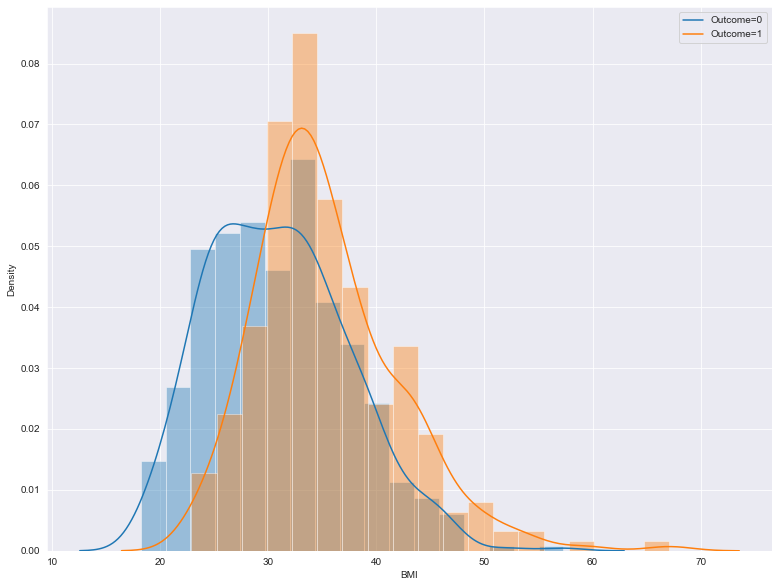

In [30]:
plt.figure(figsize=(13,10))
sns.distplot(gesamt['BMI'][gesamt.Outcome==0])
sns.distplot(gesamt['BMI'][gesamt.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()

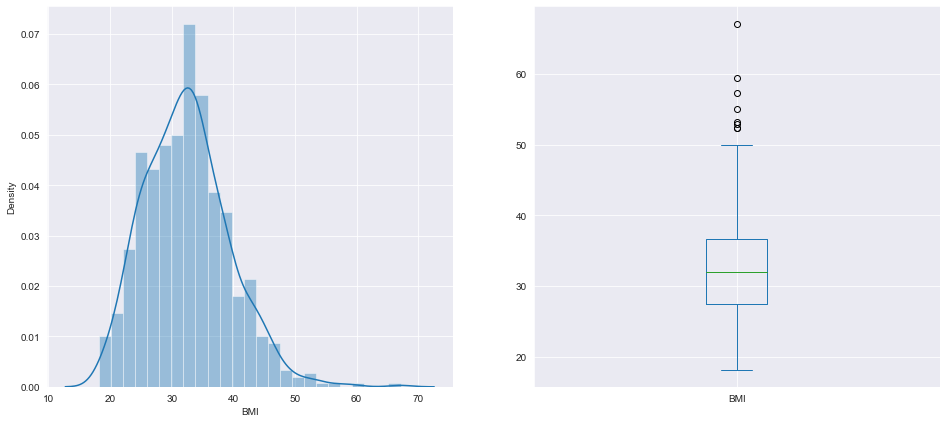

In [31]:
%matplotlib inline
sns.set_style('darkgrid')
plt.figure(1) 
plt.subplot(121), sns.distplot(gesamt['BMI'])
plt.subplot(122), gesamt['BMI'].plot.box(figsize=(16,7))
plt.show()

#### wir überprüfen Glucose vs. BMI vs. Age

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

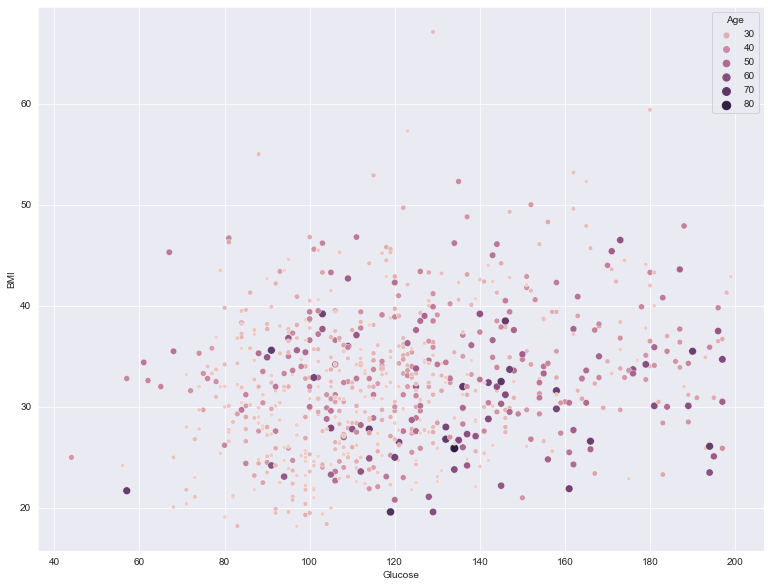

In [32]:
plt.figure(figsize=(13,10))
sns.scatterplot(data=gesamt, x="Glucose", y="BMI", hue="Age", size="Age")

Wir müssen Ausreißer im Feature-Engineering entfernen

### Überprüfung der Verteilung der BloodPressure 

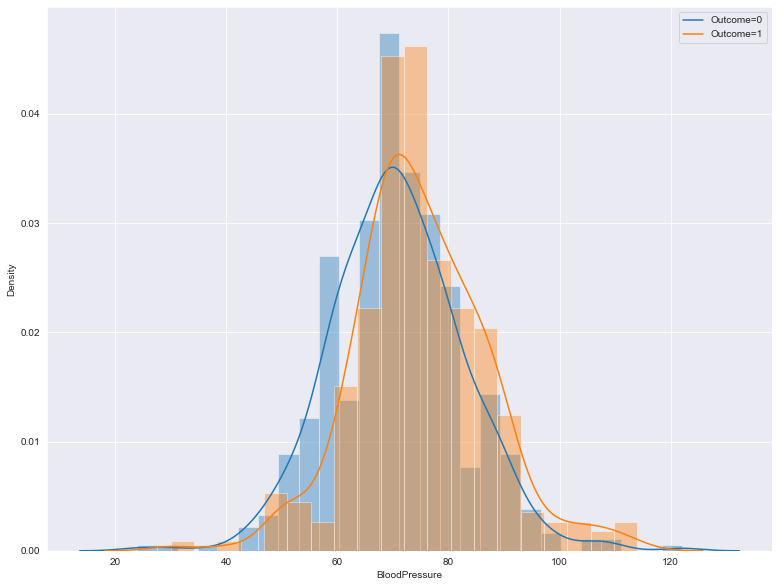

In [33]:
plt.figure(figsize=(13,10))
sns.distplot(gesamt['BloodPressure'][gesamt.Outcome==0])
sns.distplot(gesamt['BloodPressure'][gesamt.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()

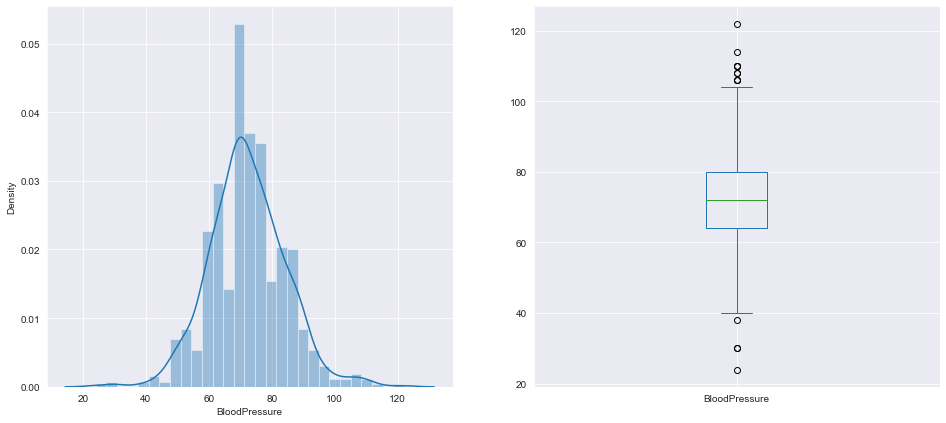

In [34]:
%matplotlib inline
sns.set_style('darkgrid')
plt.figure(1) 
plt.subplot(121), sns.distplot(gesamt['BloodPressure'])
plt.subplot(122), gesamt['BloodPressure'].plot.box(figsize=(16,7))
plt.show()

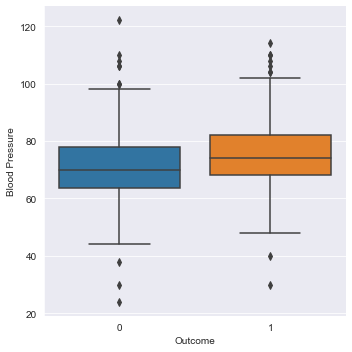

In [35]:
g = sns.catplot(y="BloodPressure",x="Outcome",data=gesamt,kind="box")
g.set_ylabels("Blood Pressure")
g.set_xlabels("Outcome")

### Überprüfung der Verteilung der SkinThickness 

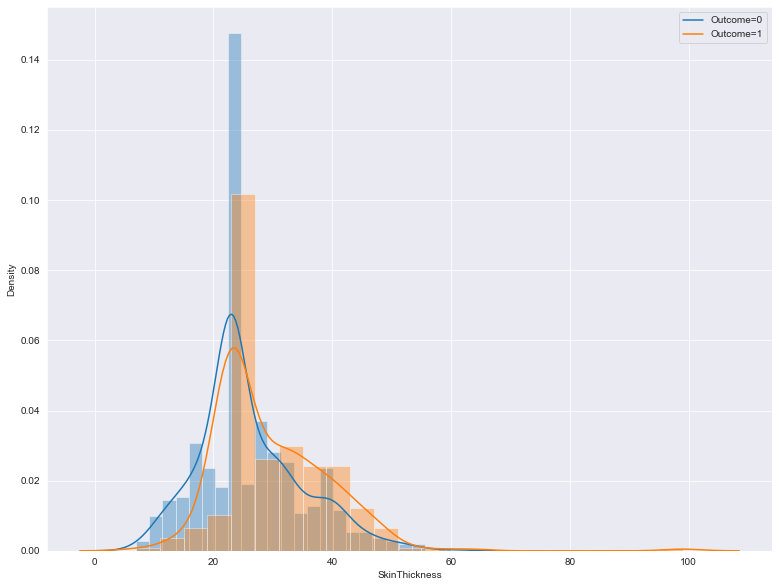

In [36]:
plt.figure(figsize=(13,10))
sns.distplot(gesamt['SkinThickness'][gesamt.Outcome==0])
sns.distplot(gesamt['SkinThickness'][gesamt.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()

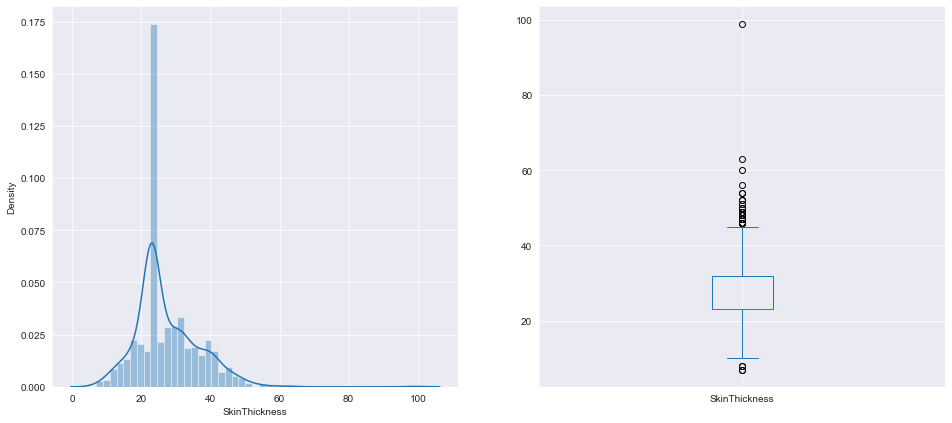

In [37]:
%matplotlib inline
sns.set_style('darkgrid')
plt.figure(1) 
plt.subplot(121), sns.distplot(gesamt['SkinThickness'])
plt.subplot(122), gesamt['SkinThickness'].plot.box(figsize=(16,7))
plt.show()

### Überprüfung der Verteilung der DiabetesPedigreeFunction 

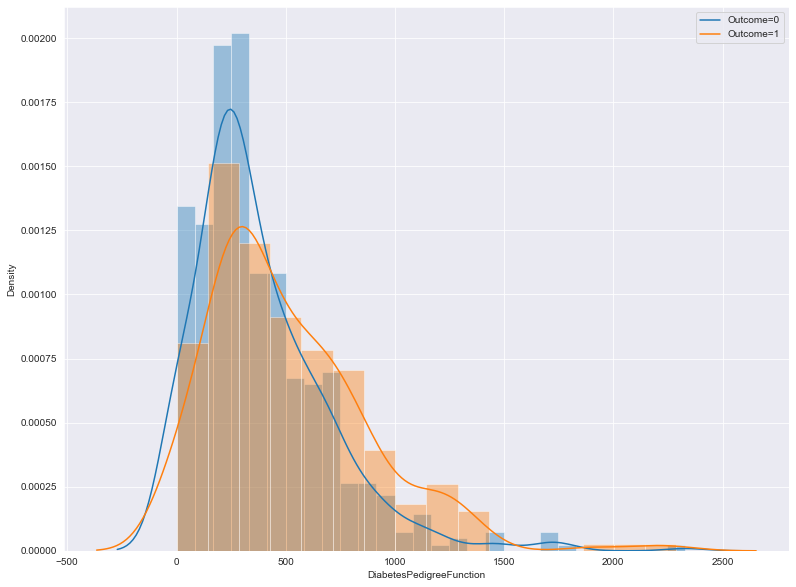

In [38]:
plt.figure(figsize=(13,10))
sns.distplot(gesamt['DiabetesPedigreeFunction'][gesamt.Outcome==0])
sns.distplot(gesamt['DiabetesPedigreeFunction'][gesamt.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()

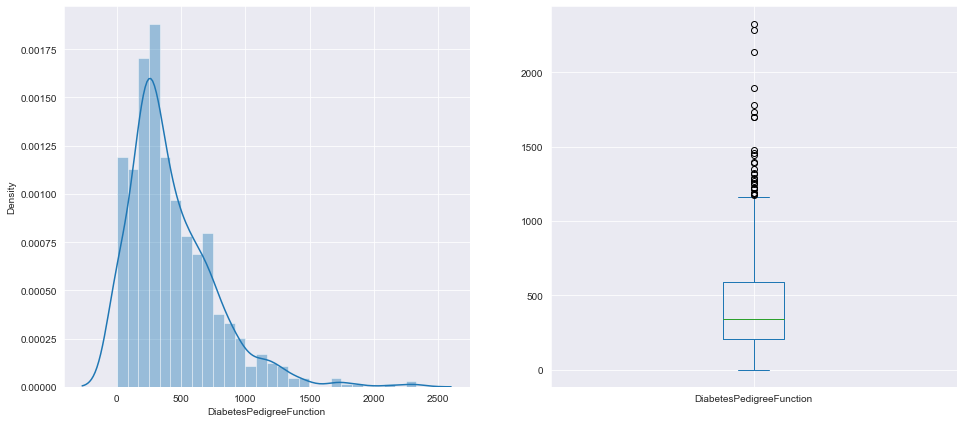

In [39]:
%matplotlib inline
sns.set_style('darkgrid')
plt.figure(1) 
plt.subplot(121), sns.distplot(gesamt['DiabetesPedigreeFunction'])
plt.subplot(122), gesamt['DiabetesPedigreeFunction'].plot.box(figsize=(16,7))
plt.show()

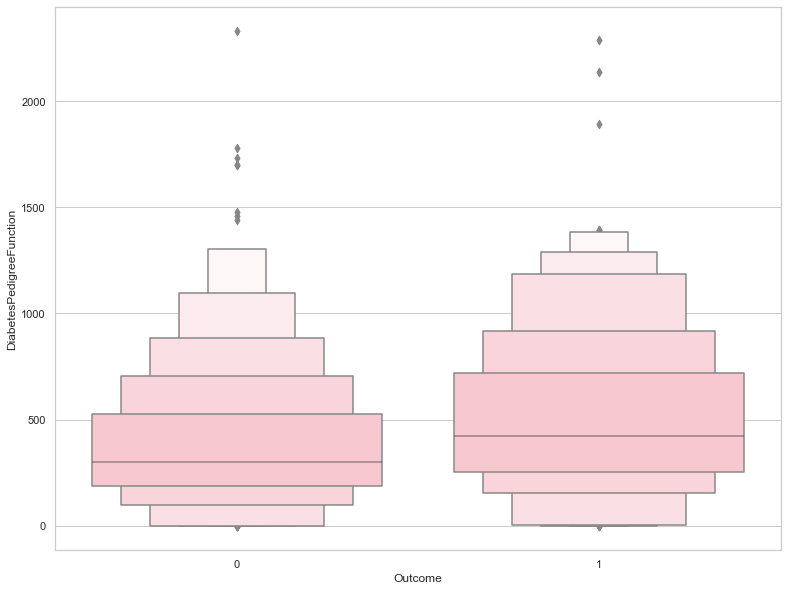

In [40]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(13,10))
sns.boxenplot(x="Outcome", y="DiabetesPedigreeFunction",
color="pink", 
scale="linear", data=gesamt)
g.set_ylabels("Diabetes Pedigree Function")
g.set_xlabels("Outcome")

# Wir können sehen, dass der Patient mit Index 0 eine Wahrscheinlichkeit von 0, 0 % hat, keinen Diabetes zu haben

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

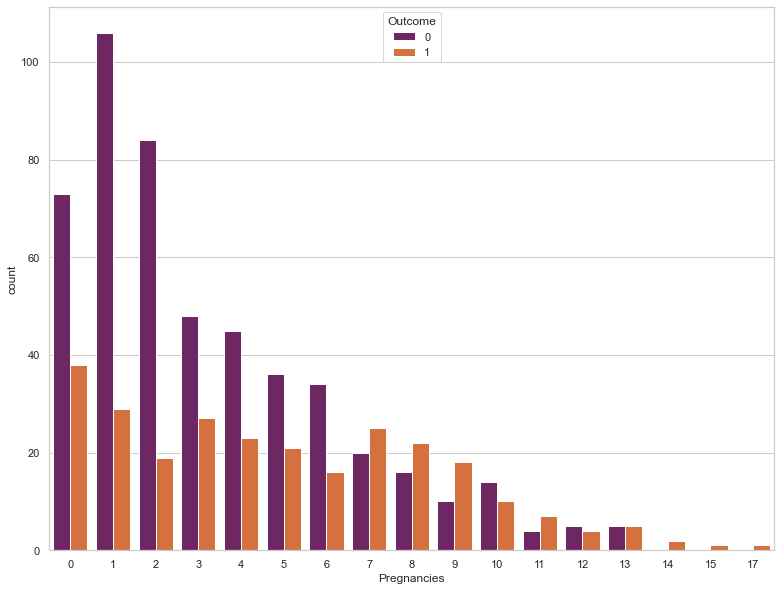

In [41]:
plt.figure(figsize=(13,10))
sns.countplot("Pregnancies",hue="Outcome",data=gesamt,palette="inferno")

Überprüfen der Verteilung von Insulin

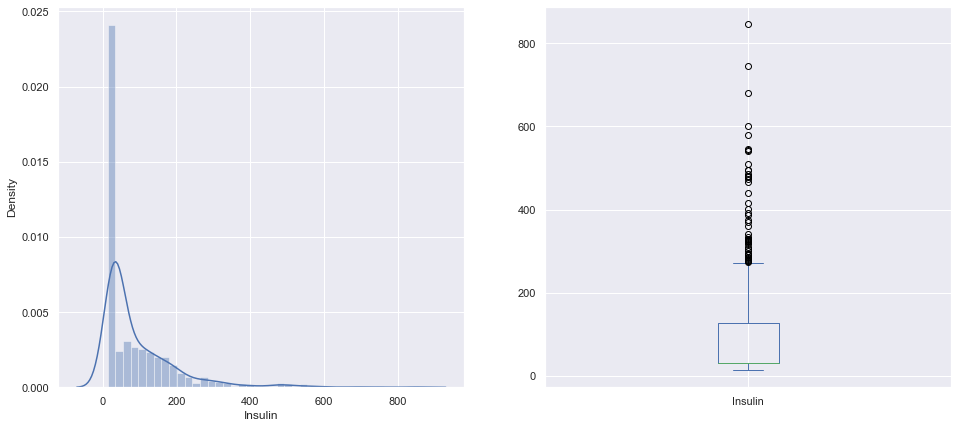

In [42]:
%matplotlib inline
sns.set_style('darkgrid')
plt.figure(1) 
plt.subplot(121), sns.distplot(gesamt['Insulin'])
plt.subplot(122), gesamt['Insulin'].plot.box(figsize=(16,7))
plt.show()

# Plotting relationships in the dataset

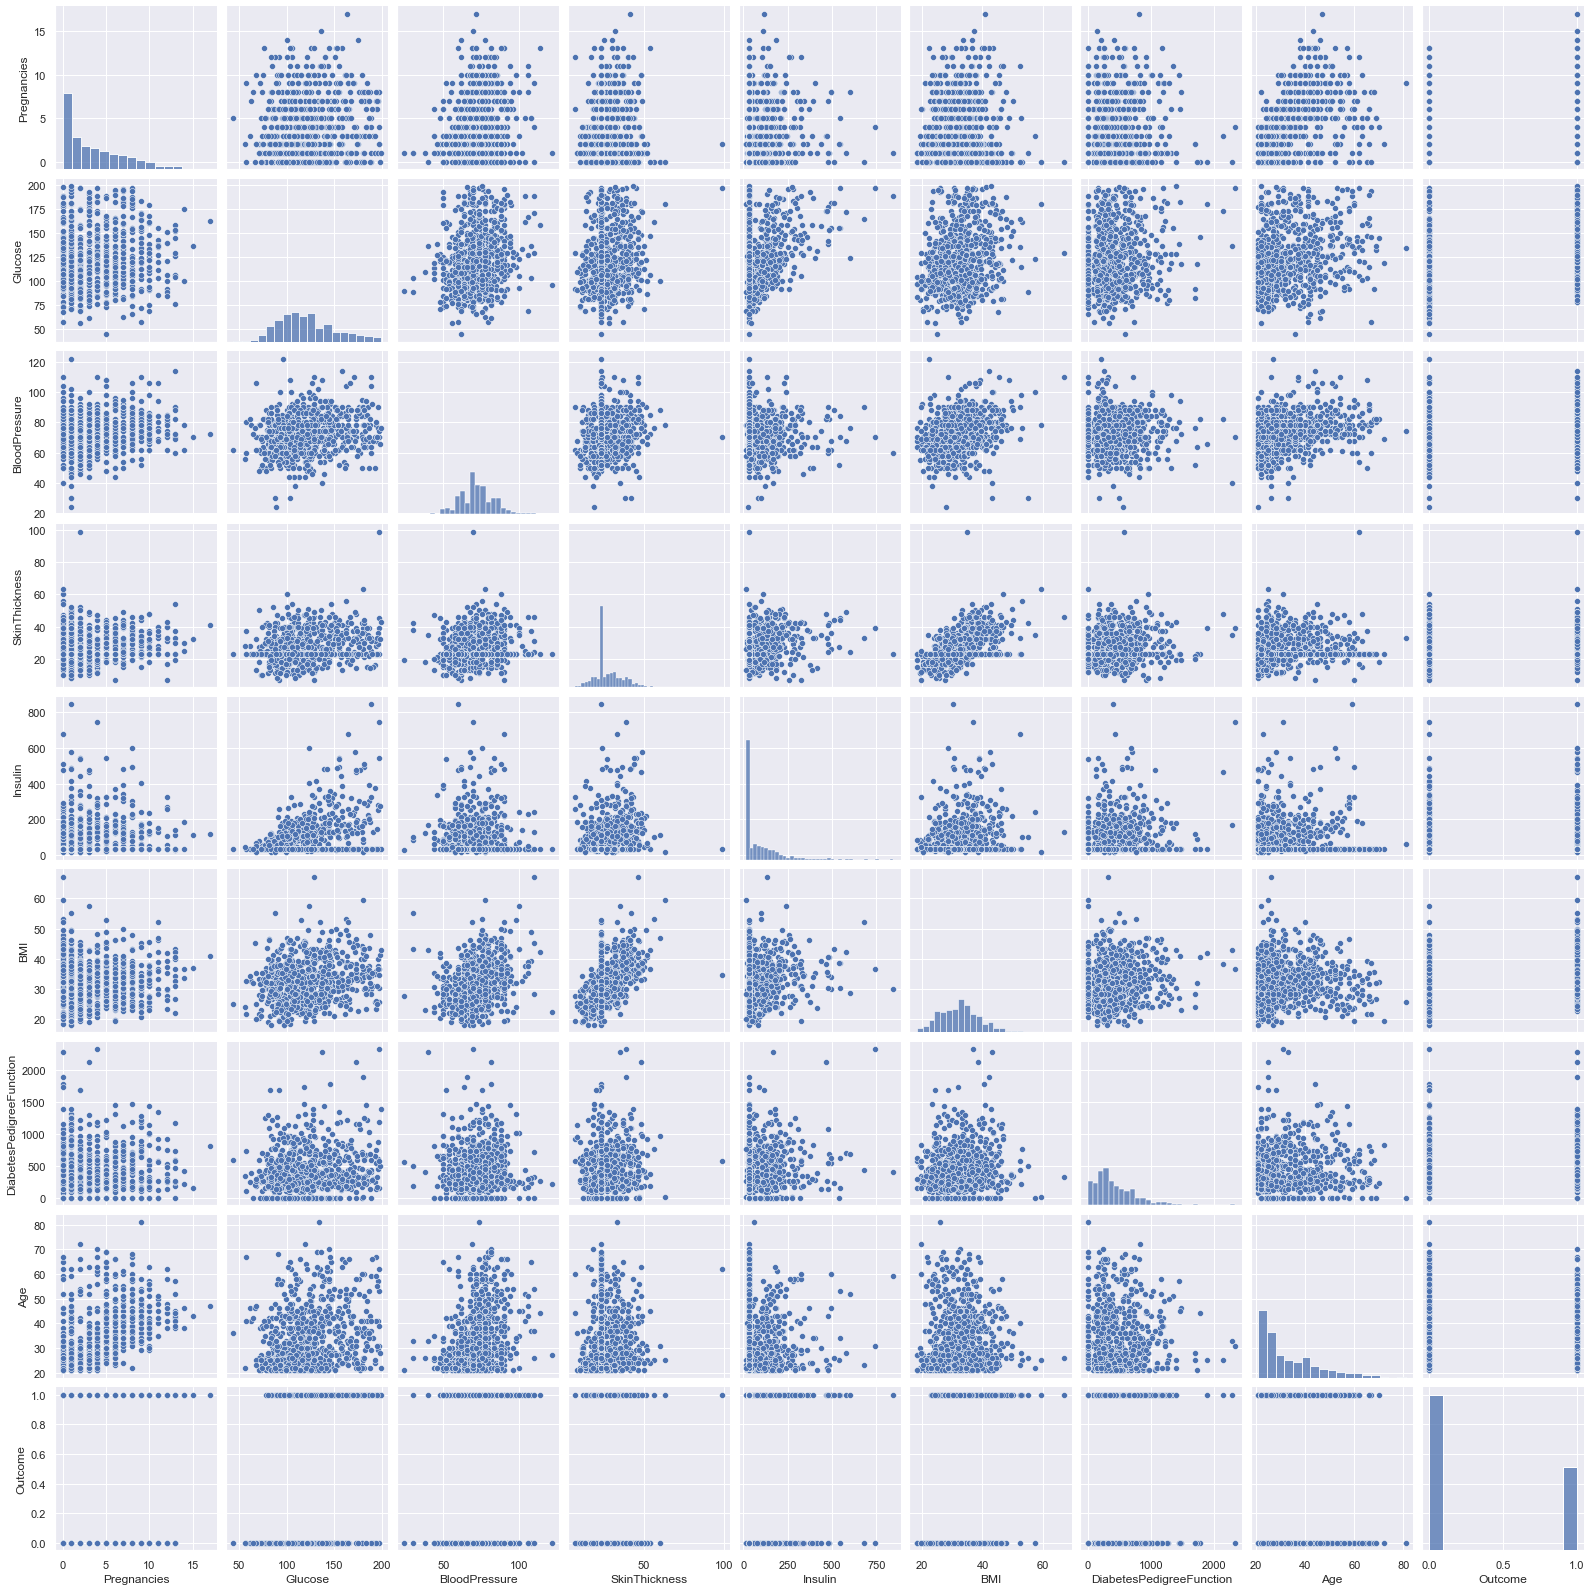

In [43]:
sns.pairplot(gesamt) 

### 6. Feature-Engineering

Bis jetzt wurde der Datensatz untersucht, fehlende Werte korrigiert und Daten visualisiert

### Ausreißererkennung

In [44]:
def detect_outliers(gesamt,n,features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(gesamt[col], 25)
        Q3 = np.percentile(gesamt[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = gesamt[(gesamt[col] < Q1 - outlier_step) | (gesamt[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   
outliers_to_drop = detect_outliers(gesamt, 2 ,["Pregnancies", 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness', 'Insulin', 'Age'])

In [45]:
gesamt.drop(gesamt.loc[outliers_to_drop].index, inplace=True)

### 7. Modellieren

#### Daten transformieren

Bevor man den Datensatz aufteile, muss man die Daten mit sklearn.preprocessing in Quantile umwandeln

In [46]:
q = QuantileTransformer()
X = q.fit_transform(gesamt)
transformedDF = q.transform(X)
transformedDF = pd.DataFrame(X)
transformedDF.columns =['Pregnancies', 
                        'Glucose', 
                        'BloodPressure', 
                        'SkinThickness', 
                        'Insulin', 
                        'BMI', 
                        'DiabetesPedigreeFunction', 
                        'Age', 
                        'Outcome']

In [47]:
transformedDF.head(13)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747712,0.811111,0.518301,0.803922,0.257516,0.593464,0.771242,0.889542,1.0
1,0.232026,0.091503,0.291503,0.645752,0.257516,0.213725,0.520261,0.558170,0.0
2,0.864052,0.957516,0.233987,0.358170,0.257516,0.077778,0.796078,0.584314,1.0
3,0.232026,0.124837,0.291503,0.358170,0.664706,0.284967,0.195425,0.000000,0.0
4,0.000000,0.722222,0.005229,0.803922,0.834641,0.928105,0.998693,0.605229,1.0
5,0.677778,0.485621,0.581699,0.358170,0.257516,0.172549,0.243137,0.528758,0.0
6,0.502614,0.039869,0.029412,0.737255,0.645752,0.435294,0.332026,0.367974,1.0
7,0.940523,0.474510,0.392810,0.358170,0.257516,0.693464,0.135294,0.496078,0.0
8,0.387582,0.996078,0.452288,0.959477,0.992157,0.409150,0.175817,0.918954,1.0
9,0.864052,0.605882,0.974510,0.358170,0.257516,0.488889,0.288889,0.926144,1.0


# Training für Gesamt

#### Datenaufteilung
Separater Zugdatensatz und Testdatensatz

In [48]:
X = gesamt.drop('Outcome', axis=1) 
y = gesamt['Outcome']

Nachdem wir den Datensatz erfolgreich geteilt haben, lassen Sie ihn uns mit train_test_split trainieren.

In [49]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=100)

Bevor wir das Modell erstellen, lassen wir uns die Nullwerte in unserem Datensatz imputieren. Wenn wir den Kopf des Datensatzes überprüfen, werden Sie feststellen, dass es einige unabhängige Variablen mit Nullwerten gibt. Dies kann unser Modell ineffizient machen. Wir müssen daher die Nullwerte imputieren, indem wir den Mittelwert der anderen Werte in derselben Spalte verwenden. Der folgende Code zeigt, wie wir die Nullwerte im Datensatz überprüfen können, indem wir für jede Variable drucken

In [50]:
print("ganz Nummer von Zeilen:", format(len(gesamt)))
print("Anzahl von den Zeilen missing Pregnancies:",format(len(gesamt.loc[gesamt['Pregnancies'] == 0])))
print("Anzahl von den Zeilen missing Glucose:",format(len(gesamt.loc[gesamt['Glucose'] == 0])))
print("Anzahl von den Zeilen missing BloodPressure:",format(len(gesamt.loc[gesamt['BloodPressure'] == 0])))
print("Anzahl von den Zeilen missing SkinThickness:",format(len(gesamt.loc[gesamt['SkinThickness'] == 0])))
print("Anzahl von den Zeilen missing Insulin:",format(len(gesamt.loc[gesamt['Insulin'] == 0])))
print("Anzahl von den Zeilen missing BMI:",format(len(gesamt.loc[gesamt['BMI'] == 0])))
print("Anzahl von den Zeilen missing DiabetesPedigreeFunction:",format(len(gesamt.loc[gesamt['DiabetesPedigreeFunction'] == 0])))
print("Anzahl von den Zeilen missing Age:",format(len(gesamt.loc[gesamt['Age'] == 0])))
print("Anzahl von den Zeilen missing Outcome:",format(len(gesamt.loc[gesamt['Outcome'] == 0])))

ganz Nummer von Zeilen: 766
Anzahl von den Zeilen missing Pregnancies: 110
Anzahl von den Zeilen missing Glucose: 0
Anzahl von den Zeilen missing BloodPressure: 0
Anzahl von den Zeilen missing SkinThickness: 0
Anzahl von den Zeilen missing Insulin: 0
Anzahl von den Zeilen missing BMI: 0
Anzahl von den Zeilen missing DiabetesPedigreeFunction: 0
Anzahl von den Zeilen missing Age: 0
Anzahl von den Zeilen missing Outcome: 500


Wir werden nun den Mittelwert verwenden, um die Nullwerte zu imputieren, wie unten gezeigt. Diese Methode berechnet den Mittelwert der Spalte und imputiert die Werte, die Null haben, mit dem Mittelwert. Dadurch wird der Datensatz für maschinelles Lernen aussagekräftiger.

In [51]:
fill_values = SimpleImputer(missing_values=0, strategy='mean')
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

### Kreuzvalidierungs Modelle

In [52]:
def evaluate_model(models):
    kfold = StratifiedKFold(n_splits = 10)
    
    result = []
    for model in models :
        result.append(cross_val_score(estimator = model, X = X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())
        
    result_gesamt = pd.DataFrame({"CrossValMeans":cv_means,
                              "CrossValerrors": cv_std,
                              "Models":["LogisticRegression",
                              "DecisionTreeClassifier",
                              "AdaBoostClassifier",
                              "SVC",
                              "RandomForestClassifier",
                              "GradientBoostingClassifier",
                              "KNeighborsClassifier"]})
    
    bar = sns.barplot(x = "CrossValMeans", y = "Models", data = result_gesamt, orient = "h")
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Cross validation scores")
    return result_gesamt

Zunächst wurde das Modelle aus der Sklearn-Bibliothek importiert.
Dann wurde die Methode, die das Vorhersageergebnis anzeigt.
Es wurde die Methode für jedes in SearchCV verwendete Modell aufgerufen

#### Überprüfen logistischer regression

,CrossValMeans,CrossValerrors,Models
0,0.771338,0.051314,LogisticRegression
1,0.732126,0.044601,DecisionTreeClassifier
2,0.728900,0.041113,AdaBoostClassifier
3,0.700952,0.019753,SVC
4,0.755024,0.054004,RandomForestClassifier
5,0.753437,0.050948,GradientBoostingClassifier
6,0.684717,0.026391,KNeighborsClassifier


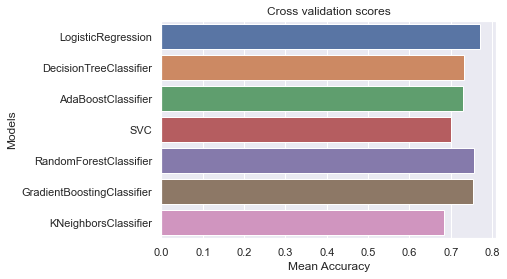

In [53]:
random_state = 23
models = [LogisticRegression(random_state = random_state, solver='liblinear'),
          DecisionTreeClassifier(random_state = random_state),
          AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state), random_state = random_state, learning_rate = 0.2),
          SVC(random_state = random_state),
          RandomForestClassifier(random_state = random_state),
          GradientBoostingClassifier(random_state = random_state),
          KNeighborsClassifier(),]
evaluate_model(models)

#### logische Regression - Hyperparameter

Rastersuche definieren

In [54]:
def analyze_grid_result(grid_result):

    print("Verbesserung der hyperparameters: (best parameters) ", grid_result.best_params_)
    print("Accuracy :", grid_result.best_score_)
    
    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, grid_result.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detail Klassifikation:")
    print()
    y_true, y_pred = y_test, grid_result.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

In [55]:
model = LogisticRegression(solver='liblinear')
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver = solvers, penalty = penalty, C = c_values)
cv = StratifiedKFold(n_splits = 50, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = cv, scoring = 'accuracy', error_score = 0)
logi_result = grid_search.fit(X_train, y_train)

analyze_grid_result(logi_result)

Verbesserung der hyperparameters: (best parameters)  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.7825641025641025
0.783 (+/-0.239) for {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.781 (+/-0.235) for {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.783 (+/-0.239) for {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.780 (+/-0.238) for {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.783 (+/-0.239) for {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.780 (+/-0.232) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.783 (+/-0.239) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.724 (+/-0.236) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.781 (+/-0.232) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.698 (+/-0.263) for {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

Detail Klassifikation:

              precision    recall  f1-score   support

           0       0.74      0.89      0.80        97
           1

Die Ergebnisse von logische Regression – Hyperparameter gibt sich wie Folgt:
# precision 0.72 
# recall 0.73 
# f1-score 0.71
Es wurde die Genauigkeit 73% beträgt,die es schlechte Wert ist.

Bei der Mustererkennung, dem Informationsabruf und der Klassifizierung (maschinelles Lernen), sind Präzision und Abruf Leistungsmetriken, die sich auf Daten beziehen, die aus einer Sammlung, einem Korpus oder einem Stichprobenraum abgerufen werden.

### 75% Genauigkeit wird angestrebt

# 8 Aufbau des Modells 

# 1- Zufällige Bäume

In [56]:
rfc = RandomForestClassifier(max_features='sqrt')
rfc.fit(X_train, y_train)
rfc

RandomForestClassifier(max_features='sqrt')

In [57]:
predictions = rfc.predict(X_test)

# Genauigkeitspunkt

In [58]:
print("Genauigkeitspunkt Score = ", accuracy_score(y_test, predictions))

Genauigkeitspunkt Score =  0.7402597402597403


In [59]:
print(confusion_matrix(y_test, predictions)) 
print(classification_report(y_test, predictions))

[[85 12]
 [28 29]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        97
           1       0.71      0.51      0.59        57

    accuracy                           0.74       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.74      0.73       154



Die Ergebnisse von Zufällige Bäumer gibt sich wie Folgt: 
# precision 0.77 
# recall 0.77 
# f1-score 0.75 
Es wurde die Genauigkeit 76% beträgt,die es schlechte Wert ist.
Bei der Mustererkennung, dem Informationsabruf und der Klassifizierung (maschinelles Lernen), sind Präzision und Abruf Leistungsmetriken, die sich auf Daten beziehen, die aus einer Sammlung, einem Korpus oder einem Stichprobenraum abgerufen werden.

# 76% Genauigkeit ist kein guter Wert

# 2- Entscheidungsbäume

In [60]:
dtree = DecisionTreeClassifier(max_features='sqrt')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_features='sqrt')

In [61]:
predictions = dtree.predict(X_test)

In [62]:
print("Genauigkeitspunkt Score = ", accuracy_score(y_test, predictions))

Genauigkeitspunkt Score =  0.7077922077922078


In [63]:
print(confusion_matrix(y_test, predictions)) 
print(classification_report(y_test, predictions))

[[76 21]
 [24 33]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        97
           1       0.61      0.58      0.59        57

    accuracy                           0.71       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.70      0.71      0.71       154



Die Ergebnisse von Entscheidungsbäume gibt sich wie Folgt: 
# precision 0.73 
# recall 0.73
# f1-score 0.73 
Es wurde die Genauigkeit 73% beträgt,die es schlechte Wert ist.
Bei der Mustererkennung, dem Informationsabruf und der Klassifizierung (maschinelles Lernen), sind Präzision und Abruf Leistungsmetriken, die sich auf Daten beziehen, die aus einer Sammlung, einem Korpus oder einem Stichprobenraum abgerufen werden.

# 73% Genauigkeit ist kein guter Wert

# 3 DecisionTreeRegressor

In [64]:
dtreer = DecisionTreeRegressor(max_features='log2')
dtreer.fit(X_train, y_train)

DecisionTreeRegressor(max_features='log2')

In [65]:
predictions = dtreer.predict(X_test)

In [66]:
print("Genauigkeitspunkt Score = ", accuracy_score(y_test, predictions))

Genauigkeitspunkt Score =  0.7207792207792207


In [67]:
print(confusion_matrix(y_test, predictions)) 
print(classification_report(y_test, predictions))

[[80 17]
 [26 31]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.79        97
           1       0.65      0.54      0.59        57

    accuracy                           0.72       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.71      0.72      0.72       154



Entscheidungsbäume, bei denen die Zielvariable kontinuierliche Werte (typischerweise relle Zahlen) annehmen kann, werden als Regressionsbäume bezeichnet. Entscheidungsbäume gehören dazu

Die Ergebnisse von DecisionTreeRegressor gibt sich wie Folgt: 
# precision 0.66 
# recall 0.67
# f1-score 0.66 
Es wurde die Genauigkeit 66% beträgt,die es schlechte Wert ist.
Bei der Mustererkennung, dem Informationsabruf und der Klassifizierung (maschinelles Lernen), sind Präzision und Abruf Leistungsmetriken, die sich auf Daten beziehen, die aus einer Sammlung, einem Korpus oder einem Stichprobenraum abgerufen werden.

# 66% Genauigkeit ist kein guter Wert

# 4 - Support-Vektor-Maschine

Beim maschinen Lernen sind Support-Vector-Machines (SVMs, auch Support-Vector-Networks) überwachte Lernmodelle mit dazugehörigen Lernalgorithmen

In [68]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [69]:
predictions = svc_model.predict(X_test)

In [70]:
print("Genauigkeitspunkt Score = ", accuracy_score(y_test, predictions))

Genauigkeitspunkt Score =  0.6753246753246753


In [71]:
print(confusion_matrix(y_test, predictions)) 
print(classification_report(y_test, predictions))

[[88  9]
 [41 16]]
              precision    recall  f1-score   support

           0       0.68      0.91      0.78        97
           1       0.64      0.28      0.39        57

    accuracy                           0.68       154
   macro avg       0.66      0.59      0.58       154
weighted avg       0.67      0.68      0.63       154



Die Ergebnisse von Entscheidungsbäume gibt sich wie Folgt: 
# precision 0.67 
# recall 0. 68
# f1-score 0.63 
Es wurde die Genauigkeit 67% beträgt,die es schlechte Wert ist.
Bei der Mustererkennung, dem Informationsabruf und der Klassifizierung (maschinelles Lernen), sind Präzision und Abruf Leistungsmetriken, die sich auf Daten beziehen, die aus einer Sammlung, einem Korpus oder einem Stichprobenraum abgerufen werden.

# 67% Genauigkeit ist kein guter Wert

# 5 - XG boost 

XGBoost (eXtreme Gradient Boosting) ist eine Open-Source-Softwarebibliothek, die ein regulierendes Gradienten-Boosting-Framework für C++, Java und Python bereitstellt

In [72]:
xgb_model= xgb.XGBClassifier(booster="gblinear")
xgb_model.fit(X_train, y_train)

[09:59:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=-1,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=8, num_parallel_tree=None,
              predictor=None, random_state=0, reg_alpha=0, reg_lambda=0,
              scale_pos_weight=1, subsample=None, tree_method=None,
              validate_parameters=1, verbosity=None)

In [73]:
predictions = xgb_model.predict(X_test)

In [74]:
print("Genauigkeitspunkt Score = ", accuracy_score(y_test, predictions))

Genauigkeitspunkt Score =  0.7337662337662337


In [75]:
print(confusion_matrix(y_test, predictions)) 
print(classification_report(y_test, predictions))

[[89  8]
 [33 24]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        97
           1       0.75      0.42      0.54        57

    accuracy                           0.73       154
   macro avg       0.74      0.67      0.68       154
weighted avg       0.74      0.73      0.71       154



Die Ergebnisse von XG boost gibt sich wie Folgt: 
# precision 0.74 
# recall 0.73 
# f1-score 0.71 
Es wurde die Genauigkeit von 73% erreicht.
Bei der Mustererkennung, dem Informationsabruf und der Klassifizierung (maschinelles Lernen), sind Präzision und Abruf Leistungsmetriken, die sich auf Daten beziehen, die aus einer Sammlung, einem Korpus oder einem Stichprobenraum abgerufen werden

# 72% ist kein guter wert

# 9 Der GridSearchCV

GridSearchCV implementiert eine „fit“- und eine „score“-Methode. Es implementiert auch „score_samples“, „predict“, „predict_proba“, „decision_function“, „transform“ und „inverse_transform“, wenn sie in dem verwendeten Schätzer implementiert sind.

#### Der GridSearchCV bereitgestellte Rastersuche generiert erschöpfend Kandidaten aus einem Raster von Parameterwerten, die mit dem Parameter param_grid angegeben werden.

In [76]:
parameters = {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], "gamma": [1, 10, 100, 1000]}
parameters0 = {'kernel': ['rbf'], 'C': [0.1], "gamma": [0.1,0.5]}
parameters1 = {'kernel': ['poly'], 'C': [1, 10, 100, 1000], "degree": [3, 5, 7, 9]}
parameters2 = {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], "degree": [3, 5, 7, 9]}
parameters3 = {'kernel': ['poly'], 'C': [1, 10, 100], "gamma": [1, 10, 100]}

svc = svm.SVR()
clf = GridSearchCV(svc, parameters)
clf.fit(X,y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=23)
clf.score(X, y)
clf.score(X_test, y_test)
clf.score(X_train, y_train)

#s = sorted(clf.cv_results_.keys())
#print(s)
#print(clf.cv_results_["param_C"], clf.cv_results_["param_kernel"])
#print(clf.best_params_)
print(clf.score(X, y))
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

0.9558655388715928
0.9542910273432328
0.9571342323886873


wir erhalten 95 % für den Schätzer mit den besten gefundenen Parametern auf.

# Bemerkung:

## Wir haben besten Kreuzvalidierungsergebnis 95% zu durchsuchen

# Modellauswahl

Basierend auf unseren Auswahlkriterien auf der Genauigkeitsbewertung ist das beste Modell für dieses XGBOOST, das eine Genauigkeitsbewertung von 0,76 (76 %) ergibt.
Feature-Bedeutungen
Vorhersagen

# Feature-Bedeutungen

Das Feature (feature „Merkmal“, „Charakteristik“) ist eine journalistische Darstellungsform.

In [77]:
dtree.feature_importances_

array([0.06830758, 0.19141065, 0.11173834, 0.04095633, 0.11967626,
       0.18913681, 0.12062045, 0.15815357])

[0.06830758 0.19141065 0.11173834 0.04095633 0.11967626 0.18913681
 0.12062045 0.15815357]
Pregnancies                 0.068308
Glucose                     0.191411
BloodPressure               0.111738
SkinThickness               0.040956
Insulin                     0.119676
BMI                         0.189137
DiabetesPedigreeFunction    0.120620
Age                         0.158154
dtype: float64
[0.06830758 0.19141065 0.11173834 0.04095633 0.11967626 0.18913681
 0.12062045 0.15815357]
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
[0.06830758079229474, 0.19141064924228238, 0.11173833987746488, 0.04095632876361908, 0.11967626330872191, 0.1891368108335449, 0.12062045485193888, 0.15815357233013336]


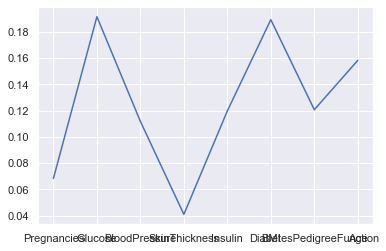

In [78]:
ss=pd.Series(dtree.feature_importances_, index=X.columns)
print(dtree.feature_importances_)
print(ss)
print(ss.values)
print(ss.index)
print(list(ss))
plt.plot(ss)

Es gibt sich starke Beziehung zwischen Glukose und DiabetesPedigreeFunction um die Vorhersagen zu bestimmen

# 11Vorhersagen

### Lassen wir uns schließlich das XGBOOST-Modell verwenden, um die Möglichkeit vorherzusagen, ob ein Patient Diabetes hat oder nicht (1 oder 0).

In [79]:
print('Prediction Probabilties')
dtree.predict(X_train)

Prediction Probabilties


array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,

print('Prediction Probabilties')
dtree.predict_proba(X_test)

# 12 Schlussfolgerung

es wurde schon die verschiedene modelle auf diabetessatz angewandt um eine modellfür diabetesvorhersage zu schließen. und es wurde am ende entschieden, dass die XGBOOST das beste modell, da es 76% Genauigkeit hat.

# 13 Verbesserungs Ansatz
Anstatt mit einem alten Datensatz zu arbeiten, hätte man sich den neuen Datensatz besorgen können, da es immer noch in der Forschung ist, warum es so ist mit diesem Stamm.Wenn wir mehr Zeit gehabt hätten, dann hätten wir uns besser auf diesen Datensatz Vorbereiten können und uns mehr mit der thematik dahinter auseinander setzen können. was das beste ist um mit diesen Datensatz arbeiten zu können.

# ANHANG NICHT BEACHTEN! 

In [80]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_transmms = scaler.transform(X_train)
X_test_transmms = scaler.transform(X_test)
seedmms = 23

In [81]:
nn2mm = MLPRegressor(hidden_layer_sizes=200, tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn3mm = MLPRegressor(hidden_layer_sizes=50, tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn4mm = MLPRegressor(hidden_layer_sizes=(5, 5), tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn1mm = MLPRegressor(hidden_layer_sizes=(2, 2), tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn5mm = MLPRegressor(hidden_layer_sizes=700, tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn6mm = MLPRegressor(hidden_layer_sizes=(20, 20), tol=0.1, solver="adam", max_iter=1000, random_state=23)

In [82]:
print("MINMAX")
for nn in nn1mm, nn2mm, nn3mm, nn4mm, nn5mm, nn6mm:

    print("hidden_layers---------------------------------------", nn.get_params()['hidden_layer_sizes'])
    nn.fit(X_train_transmms, y_train)
    y_pred_train = nn.predict(X_train_transmms)
    y_pred_test = nn.predict(X_test_transmms)

    score_falsch = nn.score(X_test, y_test)
    # Achtung: mit dieser Menge darf man nicht testen, es entsteht eine falsche Zahl 

    abweichungs_score_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    abweichungs_score_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    print("Root Mean Square Error-Trainingsmenge", abweichungs_score_train)
    print("Root Mean Square Error-Trainingsmenge", abweichungs_score_test)

    r2_score_train = r2_score(y_train, y_pred_train)
    r2_score_test = r2_score(y_test, y_pred_test)
    print("r2-Trainingsmenge", r2_score_train)
    print("r2-Testmenge", r2_score_test)
    if r2_score_train < 0.75:
        print("UNDERFITTING")
    elif r2_score_train - r2_score_test > 0.1:
        print("OVERFITTING")
    else:
        print("OK")
    print()

MINMAX
hidden_layers--------------------------------------- (2, 2)
Root Mean Square Error-Trainingsmenge 0.7460542312276942
Root Mean Square Error-Trainingsmenge 0.7007166161388078
r2-Trainingsmenge -1.3857940798684636
r2-Testmenge -1.2426470580762476
UNDERFITTING

hidden_layers--------------------------------------- 200
Root Mean Square Error-Trainingsmenge 0.4527911761117228
Root Mean Square Error-Trainingsmenge 0.4522624505167294
r2-Trainingsmenge 0.12120400169155898
r2-Testmenge 0.06576278808514324
UNDERFITTING

hidden_layers--------------------------------------- 50
Root Mean Square Error-Trainingsmenge 0.46631003292664347
Root Mean Square Error-Trainingsmenge 0.4618303591738052
r2-Trainingsmenge 0.06794470015704346
r2-Testmenge 0.025815857767359285
UNDERFITTING

hidden_layers--------------------------------------- (5, 5)
Root Mean Square Error-Trainingsmenge 0.9195891554362509
Root Mean Square Error-Trainingsmenge 0.8856776843946546
r2-Trainingsmenge -2.6247648946351525
r2-Testme

In [83]:
scaler = StandardScaler()
scaler.fit(X_train)
XTrain_transss = scaler.transform(X_train)
XTest_transss = scaler.transform(X_test)
seedss = 23

In [84]:
nn2ss = MLPRegressor(hidden_layer_sizes=200, tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn3ss = MLPRegressor(hidden_layer_sizes=50, tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn4ss = MLPRegressor(hidden_layer_sizes=(5, 5), tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn1ss = MLPRegressor(hidden_layer_sizes=(2, 2), tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn5ss = MLPRegressor(hidden_layer_sizes=700, tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn6ss = MLPRegressor(hidden_layer_sizes=(25, 25), tol=0.1, solver="adam", max_iter=1000, random_state=23)

In [85]:
print("STANDERD")
for nn in nn1ss, nn2ss, nn3ss, nn4ss, nn5ss, nn6ss:

    print("hidden_layers---------------------------------------", nn.get_params()['hidden_layer_sizes'])
    nn.fit(XTrain_transss, y_train)
    y_pred_train = nn.predict(XTrain_transss)
    y_pred_test = nn.predict(XTest_transss)

    score_falsch = nn.score(X_test, y_test)
    # Achtung: mit dieser Menge darf man nicht testen, es entsteht eine falsche Zahl 
    
    abweichungs_score_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    abweichungs_score_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    print("Root Mean Square Error-Trainingsmenge", abweichungs_score_train)
    print("Root Mean Square Error-Trainingsmenge", abweichungs_score_test)

    r2_score_train = r2_score(y_train, y_pred_train)
    r2_score_test = r2_score(y_test, y_pred_test)
    print("r2-Trainingsmenge", r2_score_train)
    print("r2-Testmenge", r2_score_test)
    if r2_score_train < 0.75:
        print("UNDERFITTING")
    elif r2_score_train - r2_score_test > 0.1:
        print("OVERFITTING")
    else:
        print("OK")
    print()

STANDERD
hidden_layers--------------------------------------- (2, 2)
Root Mean Square Error-Trainingsmenge 0.7340989633908377
Root Mean Square Error-Trainingsmenge 0.6945837089563217
r2-Trainingsmenge -1.3099436340069794
r2-Testmenge -1.2035620517948997
UNDERFITTING

hidden_layers--------------------------------------- 200
Root Mean Square Error-Trainingsmenge 0.4035158685873292
Root Mean Square Error-Trainingsmenge 0.39823339347743775
r2-Trainingsmenge 0.3020675393260507
r2-Testmenge 0.27564502409562064
UNDERFITTING

hidden_layers--------------------------------------- 50
Root Mean Square Error-Trainingsmenge 0.4608549127436012
Root Mean Square Error-Trainingsmenge 0.44681929552989846
r2-Trainingsmenge 0.08962441110249153
r2-Testmenge 0.08811528169968474
UNDERFITTING

hidden_layers--------------------------------------- (5, 5)
Root Mean Square Error-Trainingsmenge 1.191117988055953
Root Mean Square Error-Trainingsmenge 1.1957347461635381
r2-Trainingsmenge -5.081374204752516
r2-Testmen

In [86]:
scaler = MaxAbsScaler()
scaler.fit(X_train)
XTrain_transabs = scaler.transform(X_train)
XTest_transabs = scaler.transform(X_test)
seedabs = 23

In [87]:
nn2abs = MLPRegressor(hidden_layer_sizes=200, tol=0.1, solver="lbfgs", max_iter=1000, random_state=23)
nn3abs = MLPRegressor(hidden_layer_sizes=50, tol=0.1, solver="lbfgs", max_iter=1000, random_state=23)
nn4abs = MLPRegressor(hidden_layer_sizes=(5, 5), tol=0.1, solver="lbfgs", max_iter=1000, random_state=23)
nn1abs = MLPRegressor(hidden_layer_sizes=(2, 2), tol=0.1, solver="lbfgs", max_iter=1000, random_state=23)
nn5abs = MLPRegressor(hidden_layer_sizes=350, tol=0.1, solver="lbfgs", max_iter=1000, random_state=23)
nn6abs = MLPRegressor(hidden_layer_sizes=(25, 25), tol=0.1, solver="sgd", max_iter=1000, random_state=23)

In [88]:
print("ABS")
for nn in nn1abs, nn2abs, nn3abs, nn4abs, nn5abs, nn6abs:

    print("hidden_layers---------------------------------------", nn.get_params()['hidden_layer_sizes'])
    nn.fit(XTrain_transabs, y_train)
    y_pred_train = nn.predict(XTrain_transabs)
    y_pred_test = nn.predict(XTest_transabs)

    score_falsch = nn.score(X_test, y_test)
    # Achtung: mit dieser Menge darf man nicht testen, es entsteht eine falsche Zahl 

    abweichungs_score_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    abweichungs_score_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    print("Root Mean Square Error-Trainingsmenge", abweichungs_score_train)
    print("Root Mean Square Error-Trainingsmenge", abweichungs_score_test)

    r2_score_train = r2_score(y_train, y_pred_train)
    r2_score_test = r2_score(y_test, y_pred_test)
    print("r2-Trainingsmenge", r2_score_train)
    print("r2-Testmenge", r2_score_test)
    if r2_score_train < 0.75:
        print("UNDERFITTING")
    elif r2_score_train - r2_score_test > 0.1:
        print("OVERFITTING")
    else:
        print("OK")
    print()

ABS
hidden_layers--------------------------------------- (2, 2)
Root Mean Square Error-Trainingsmenge 0.4830075501676361
Root Mean Square Error-Trainingsmenge 0.47026390819515007
r2-Trainingsmenge -2.220446049250313e-16
r2-Testmenge -0.010088429443623204
UNDERFITTING

hidden_layers--------------------------------------- 200
Root Mean Square Error-Trainingsmenge 0.471013464189878
Root Mean Square Error-Trainingsmenge 0.4614718182819824
r2-Trainingsmenge 0.04904754335440353
r2-Testmenge 0.02732788165661615
UNDERFITTING

hidden_layers--------------------------------------- 50
Root Mean Square Error-Trainingsmenge 0.5042098560830016
Root Mean Square Error-Trainingsmenge 0.489132376074711
r2-Trainingsmenge -0.08971975137959243
r2-Testmenge -0.09277039030416279
UNDERFITTING

hidden_layers--------------------------------------- (5, 5)
Root Mean Square Error-Trainingsmenge 0.4931834525267134
Root Mean Square Error-Trainingsmenge 0.47091810549679636
r2-Trainingsmenge -0.042579434835389174
r2-Te

In [89]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_transmms = scaler.transform(X_train)
X_test_transmms = scaler.transform(X_test)
seedmms = 23

In [90]:
nn2mm = MLPClassifier(hidden_layer_sizes=200, tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn3mm = MLPClassifier(hidden_layer_sizes=50, tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn4mm = MLPClassifier(hidden_layer_sizes=(5, 5), tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn1mm = MLPClassifier(hidden_layer_sizes=(2, 2), tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn5mm = MLPClassifier(hidden_layer_sizes=700, tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn6mm = MLPClassifier(hidden_layer_sizes=(20, 20), tol=0.1, solver="adam", max_iter=1000, random_state=23)

In [91]:
print("MINMAX")
for nn in nn1mm, nn2mm, nn3mm, nn4mm, nn5mm, nn6mm:

    print("hidden_layers---------------------------------------", nn.get_params()['hidden_layer_sizes'])
    nn.fit(X_train_transmms, y_train)
    y_pred_train = nn.predict(X_train_transmms)
    y_pred_test = nn.predict(X_test_transmms)

    score_falsch = nn.score(X_test, y_test)
    # Achtung: mit dieser Menge darf man nicht testen, es entsteht eine falsche Zahl 

    abweichungs_score_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    abweichungs_score_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    print("Root Mean Square Error-Trainingsmenge", abweichungs_score_train)
    print("Root Mean Square Error-Trainingsmenge", abweichungs_score_test)

#    r2_score_train = r2_score(y_train, y_pred_train)
#    r2_score_test = r2_score(y_test, y_pred_test)
#    print("r2-Trainingsmenge", r2_score_train)
#    print("r2-Testmenge", r2_score_test)
    if r2_score_train < 0.75:
        print("UNDERFITTING")
    elif r2_score_train - r2_score_test > 0.1:
        print("OVERFITTING")
    else:
        print("OK")
    print()

MINMAX
hidden_layers--------------------------------------- (2, 2)
Root Mean Square Error-Trainingsmenge 0.6088983331859745
Root Mean Square Error-Trainingsmenge 0.5689989377166845
UNDERFITTING

hidden_layers--------------------------------------- 200
Root Mean Square Error-Trainingsmenge 0.6088983331859745
Root Mean Square Error-Trainingsmenge 0.5643915830412719
UNDERFITTING

hidden_layers--------------------------------------- 50
Root Mean Square Error-Trainingsmenge 0.7171891754034823
Root Mean Square Error-Trainingsmenge 0.7404747612597361
UNDERFITTING

hidden_layers--------------------------------------- (5, 5)
Root Mean Square Error-Trainingsmenge 0.6088983331859745
Root Mean Square Error-Trainingsmenge 0.5689989377166845
UNDERFITTING

hidden_layers--------------------------------------- 700
Root Mean Square Error-Trainingsmenge 0.5527051915086619
Root Mean Square Error-Trainingsmenge 0.531021971488615
UNDERFITTING

hidden_layers--------------------------------------- (20, 20)
Ro

In [92]:
scaler = StandardScaler()
scaler.fit(X_train)
XTrain_transss = scaler.transform(X_train)
XTest_transss = scaler.transform(X_test)
seedss = 23

In [93]:
nn2ss = MLPClassifier(hidden_layer_sizes=200, tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn3ss = MLPClassifier(hidden_layer_sizes=50, tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn4ss = MLPClassifier(hidden_layer_sizes=(5, 5), tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn1ss = MLPClassifier(hidden_layer_sizes=(2, 2), tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn5ss = MLPClassifier(hidden_layer_sizes=700, tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn6ss = MLPClassifier(hidden_layer_sizes=(25, 25), tol=0.1, solver="adam", max_iter=1000, random_state=23)

In [94]:
print("STANDERD")
for nn in nn1ss, nn2ss, nn3ss, nn4ss, nn5ss, nn6ss:

    print("hidden_layers---------------------------------------", nn.get_params()['hidden_layer_sizes'])
    nn.fit(XTrain_transss, y_train)
    y_pred_train = nn.predict(XTrain_transss)
    y_pred_test = nn.predict(XTest_transss)

    score_falsch = nn.score(X_test, y_test)
    # Achtung: mit dieser Menge darf man nicht testen, es entsteht eine falsche Zahl 

    abweichungs_score_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    abweichungs_score_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    print("Root Mean Square Error-Trainingsmenge", abweichungs_score_train)
    print("Root Mean Square Error-Trainingsmenge", abweichungs_score_test)

    r2_score_train = r2_score(y_train, y_pred_train)
    r2_score_test = r2_score(y_test, y_pred_test)
    print("r2-Trainingsmenge", r2_score_train)
    print("r2-Testmenge", r2_score_test)
    if r2_score_train < 0.75:
        print("UNDERFITTING")
    elif r2_score_train - r2_score_test > 0.1:
        print("OVERFITTING")
    else:
        print("OK")
    print()

STANDERD
hidden_layers--------------------------------------- (2, 2)
Root Mean Square Error-Trainingsmenge 0.6002610398209207
Root Mean Square Error-Trainingsmenge 0.5870668782875128
r2-Trainingsmenge -0.5444450937993108
r2-Testmenge -0.574168638684768
UNDERFITTING

hidden_layers--------------------------------------- 200
Root Mean Square Error-Trainingsmenge 0.5006523159981988
Root Mean Square Error-Trainingsmenge 0.4980379257214445
r2-Trainingsmenge -0.07439658699082496
r2-Testmenge -0.13292439905343145
UNDERFITTING

hidden_layers--------------------------------------- 50
Root Mean Square Error-Trainingsmenge 0.557409150297615
Root Mean Square Error-Trainingsmenge 0.5135246554953
r2-Trainingsmenge -0.33180410262404325
r2-Testmenge -0.20447751899364808
UNDERFITTING

hidden_layers--------------------------------------- (5, 5)
Root Mean Square Error-Trainingsmenge 0.6174148073916134
Root Mean Square Error-Trainingsmenge 0.6067505369583258
r2-Trainingsmenge -0.6339781427152129
r2-Testmen

In [95]:
scaler = MaxAbsScaler()
scaler.fit(X_train)
XTrain_transabs = scaler.transform(X_train)
XTest_transabs = scaler.transform(X_test)
seedabs = 23

In [96]:
nn2abs = MLPClassifier(hidden_layer_sizes=200, tol=0.1, solver="lbfgs", max_iter=1000, random_state=23)
nn3abs = MLPClassifier(hidden_layer_sizes=50, tol=0.1, solver="lbfgs", max_iter=1000, random_state=23)
nn4abs = MLPClassifier(hidden_layer_sizes=(5, 5), tol=0.1, solver="lbfgs", max_iter=1000, random_state=23)
nn1abs = MLPClassifier(hidden_layer_sizes=(2, 2), tol=0.1, solver="lbfgs", max_iter=1000, random_state=23)
nn5abs = MLPClassifier(hidden_layer_sizes=350, tol=0.1, solver="lbfgs", max_iter=1000, random_state=23)
nn6abs = MLPClassifier(hidden_layer_sizes=(25, 25), tol=0.1, solver="sgd", max_iter=1000, random_state=23)

In [97]:
print("ABS")
for nn in nn1abs, nn2abs, nn3abs, nn4abs, nn5abs, nn6abs:

    print("hidden_layers---------------------------------------", nn.get_params()['hidden_layer_sizes'])
    nn.fit(XTrain_transabs, y_train)
    y_pred_train = nn.predict(XTrain_transabs)
    y_pred_test = nn.predict(XTest_transabs)

    score_falsch = nn.score(X_test, y_test)
    # Achtung: mit dieser Menge darf man nicht testen, es entsteht eine falsche Zahl 

    abweichungs_score_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    abweichungs_score_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    print("Root Mean Square Error-Trainingsmenge", abweichungs_score_train)
    print("Root Mean Square Error-Trainingsmenge", abweichungs_score_test)

    r2_score_train = r2_score(y_train, y_pred_train)
    r2_score_test = r2_score(y_test, y_pred_test)
    print("r2-Trainingsmenge", r2_score_train)
    print("r2-Testmenge", r2_score_test)
    if r2_score_train < 0.75:
        print("UNDERFITTING")
    elif r2_score_train - r2_score_test > 0.1:
        print("OVERFITTING")
    else:
        print("OK")
    print()

ABS
hidden_layers--------------------------------------- (2, 2)
Root Mean Square Error-Trainingsmenge 0.6088983331859745
Root Mean Square Error-Trainingsmenge 0.5689989377166845
r2-Trainingsmenge -0.5892116182572618
r2-Testmenge -0.4787644787644789
UNDERFITTING

hidden_layers--------------------------------------- 200
Root Mean Square Error-Trainingsmenge 0.6088983331859745
Root Mean Square Error-Trainingsmenge 0.5689989377166845
r2-Trainingsmenge -0.5892116182572618
r2-Testmenge -0.4787644787644789
UNDERFITTING

hidden_layers--------------------------------------- 50
Root Mean Square Error-Trainingsmenge 0.6088983331859745
Root Mean Square Error-Trainingsmenge 0.5689989377166845
r2-Trainingsmenge -0.5892116182572618
r2-Testmenge -0.4787644787644789
UNDERFITTING

hidden_layers--------------------------------------- (5, 5)
Root Mean Square Error-Trainingsmenge 0.6088983331859745
Root Mean Square Error-Trainingsmenge 0.5689989377166845
r2-Trainingsmenge -0.5892116182572618
r2-Testmenge -

In [98]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_transmms = scaler.transform(X_train)
X_test_transmms = scaler.transform(X_test)
seedmms = 23

In [99]:
nn2mm = MLPClassifier(hidden_layer_sizes=200, tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn3mm = MLPClassifier(hidden_layer_sizes=50, tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn4mm = MLPClassifier(hidden_layer_sizes=(5, 5), tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn1mm = MLPClassifier(hidden_layer_sizes=(2, 2), tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn5mm = MLPClassifier(hidden_layer_sizes=700, tol=0.1, solver="adam", max_iter=1000, random_state=23)
nn6mm = MLPClassifier(hidden_layer_sizes=(20, 20), tol=0.1, solver="adam", max_iter=1000, random_state=23)

In [100]:
print("MINMAX")
for nn in nn1mm, nn2mm, nn3mm, nn4mm, nn5mm, nn6mm:

    print("hidden_layers---------------------------------------", nn.get_params()['hidden_layer_sizes'])
    nn.fit(X_train_transmms, y_train)
    y_pred_train = nn.predict(X_train_transmms)
    y_pred_test = nn.predict(X_test_transmms)

    score_falsch = nn.score(X_test, y_test)
    # Achtung: mit dieser Menge darf man nicht testen, es entsteht eine falsche Zahl 

    abweichungs_score_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    abweichungs_score_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    print("Root Mean Square Error-Trainingsmenge", abweichungs_score_train)
    print("Root Mean Square Error-Trainingsmenge", abweichungs_score_test)

    r2_score_train = r2_score(y_train, y_pred_train)
    r2_score_test = r2_score(y_test, y_pred_test)
    print("r2-Trainingsmenge", r2_score_train)
    print("r2-Testmenge", r2_score_test)
    if r2_score_train < 0.75:
        print("UNDERFITTING")
    elif r2_score_train - r2_score_test > 0.1:
        print("OVERFITTING")
    else:
        print("OK")
    print()

MINMAX
hidden_layers--------------------------------------- (2, 2)
Root Mean Square Error-Trainingsmenge 0.6088983331859745
Root Mean Square Error-Trainingsmenge 0.5689989377166845
r2-Trainingsmenge -0.5892116182572618
r2-Testmenge -0.4787644787644789
UNDERFITTING

hidden_layers--------------------------------------- 200
Root Mean Square Error-Trainingsmenge 0.6088983331859745
Root Mean Square Error-Trainingsmenge 0.5643915830412719
r2-Trainingsmenge -0.5892116182572618
r2-Testmenge -0.4549134387844067
UNDERFITTING

hidden_layers--------------------------------------- 50
Root Mean Square Error-Trainingsmenge 0.7171891754034823
Root Mean Square Error-Trainingsmenge 0.7404747612597361
r2-Trainingsmenge -1.2047513295540884
r2-Testmenge -1.5043591979075854
UNDERFITTING

hidden_layers--------------------------------------- (5, 5)
Root Mean Square Error-Trainingsmenge 0.6088983331859745
Root Mean Square Error-Trainingsmenge 0.5689989377166845
r2-Trainingsmenge -0.5892116182572618
r2-Testmeng